In [6]:
# Mount  Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load data from the provided URL
data_url = 'https://drive.google.com/uc?id=1aDdXwh9a7G3mwP0kc-Rw0RoOrre8i_Lk'
data_values = pd.read_csv(data_url, header=None).values

# Partition the data into training and testing sets
X_training, X_validation, Y_training, Y_validation = train_test_split(data_values[:,0:8], data_values[:,8], test_size=0.1, random_state=30)

# Setting a random seed for reproducibility
np.random.seed(155)

# Initializing the neural network
neural_net = Sequential()
neural_net.add(Dense(16, activation='relu', input_shape=(8,)))
neural_net.add(Dense(8, activation='relu'))
neural_net.add(Dense(64, activation='relu'))
neural_net.add(Dense(1, activation='sigmoid'))

# Compiling and training the neural network
neural_net.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
neural_net.fit(X_training, Y_training, epochs=100, initial_epoch=0)

# Displaying the model architecture and its performance on the validation set
print(neural_net.summary())
print(neural_net.evaluate(X_validation, Y_validation))


Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.6426 - acc: 0.3517
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3784 - acc: 0.5745
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3242 - acc: 0.6208
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3014 - acc: 0.6310
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2944 - acc: 0.6483
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2893 - acc: 0.6599
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2903 - acc: 0.6339
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2777 - acc: 0.6353
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2596 - acc: 0.6208
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 0.2314 - acc: 0.6411
Epoch 11/100
22/22 [==============================] - 0s 3m

Epoch 1/10
235/235 [==============================] - 14s 52ms/step - loss: 0.4098 - accuracy: 0.8710 - val_loss: 0.2610 - val_accuracy: 0.9160
Epoch 2/10
235/235 [==============================] - 11s 46ms/step - loss: 0.1833 - accuracy: 0.9446 - val_loss: 0.1948 - val_accuracy: 0.9396
Epoch 3/10
235/235 [==============================] - 12s 53ms/step - loss: 0.1225 - accuracy: 0.9616 - val_loss: 0.2038 - val_accuracy: 0.9373
Epoch 4/10
235/235 [==============================] - 12s 51ms/step - loss: 0.0891 - accuracy: 0.9729 - val_loss: 0.1149 - val_accuracy: 0.9650
Epoch 5/10
235/235 [==============================] - 12s 51ms/step - loss: 0.0666 - accuracy: 0.9796 - val_loss: 0.0984 - val_accuracy: 0.9672
Epoch 6/10
235/235 [==============================] - 12s 50ms/step - loss: 0.0505 - accuracy: 0.9833 - val_loss: 0.1684 - val_accuracy: 0.9437
Epoch 7/10
235/235 [==============================] - 10s 44ms/step - loss: 0.0381 - accuracy: 0.9878 - val_loss: 0.1238 - val_accuracy:

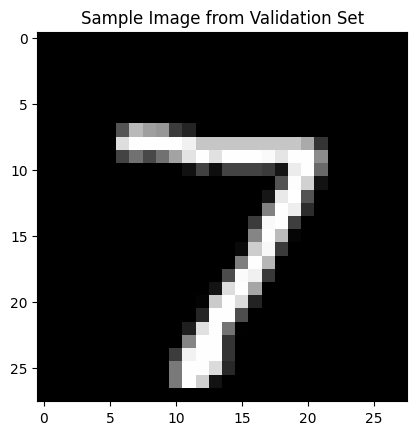

1/1 [==============================] - 0s 69ms/step
Predicted Label: 7, True Label: 7


In [7]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(training_images, training_labels), (validation_images, validation_labels) = mnist.load_data()

# Flatten the images into one-dimensional arrays
image_dimensions = np.prod(training_images.shape[1:])
flattened_training_images = training_images.reshape(training_images.shape[0], image_dimensions)
flattened_validation_images = validation_images.reshape(validation_images.shape[0], image_dimensions)

# Convert pixel values to float type
flattened_training_images = flattened_training_images.astype('float32')
flattened_validation_images = flattened_validation_images.astype('float32')

# Normalize pixel values between 0 and 1
flattened_training_images /= 255.0
flattened_validation_images /= 255.0

# Convert labels to one-hot encoded vectors
encoded_training_labels = to_categorical(training_labels)
encoded_validation_labels = to_categorical(validation_labels)

# Build a neural network with three hidden layers and tanh activation
neural_model = Sequential()
neural_model.add(Dense(512, activation='tanh', input_shape=(image_dimensions,)))
neural_model.add(Dense(512, activation='tanh'))
neural_model.add(Dense(512, activation='tanh'))
neural_model.add(Dense(512, activation='sigmoid'))
neural_model.add(Dense(10, activation='softmax'))

# Compile the model
neural_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
training_history = neural_model.fit(flattened_training_images, encoded_training_labels, batch_size=256, epochs=10, verbose=1,
                                    validation_data=(flattened_validation_images, encoded_validation_labels))

# Display an image from the validation dataset
plt.imshow(validation_images[0], cmap='gray')
plt.title('Sample Image from Validation Set')
plt.show()

# Predict the class of the displayed image
sample_image = flattened_validation_images[0].reshape(1, image_dimensions)
predicted_label = np.argmax(neural_model.predict(sample_image), axis=-1)
print(f"Predicted Label: {predicted_label[0]}, True Label: {validation_labels[0]}")
